# Validasi Vocabulary Untuk Dataset
## Kontributor: Rochim Farul Noviyan, Reyhan Venyutzky, Hasna Zakiyyah Harsari, Nur Aini Rakhmawati
## email kontributor: rochim.noviyan@gmail.com ,hasnazakiyyah16@gmail.com, venyutzky08@gmail.com
## Departemen Sistem Informasi, Institut Teknologi Sepuluh Nopember
Abstrak:

*SHACL (SHAPES Constraint Language) adalah bahasa standar yang dibuat oleh W3C untuk pemodelan data, desain ontologi, validasi data, penarikan kesimpulan, dan transformasi data. SHACL didasarkan pada RDF dan SPARQL dimana dapat memvalidasi grafik RDF terhadap serangkaian kondisi. Grafik RDF dalam SHACL disebut "shapes graph" dan grafik RDF yang divalidasi terhadap shapes graph disebut "data graph". Pada kesempatan kali ini kami akan membuat model data SHACL berupa shapes graph dan data graph dengan mereferensi pada grafik RDF yang telah dibuat sebelumnya. Pada graph data kami membuat dua data valid dan invalid dengan 2 kesalahan sehingga dapat menunjukkan apabila validasinya telah berjalan dengan sesuai.*



## Vocabulary

Vocabulary ini terdiri atas 4 class dan 6 properti. Vocabulary ini dapat diakses pada [3] dan dataset dapat diakses di [2]


In [49]:
!python -m pip install --no-input jupyter-rdfify --quiet
%reload_ext jupyter-rdfify

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyshacl 0.17.0.post2 requires rdflib<7,>=6.0.0, but you have rdflib 5.0.0 which is incompatible.


In [50]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/rochimfn/d43d8f372126dfbade9b41c1e8490e7c/raw/ed69463ca6312daf020d4709ae3cc33ae2059dea/dataset.csv')
df.head()

,Seller_name,Seller_Location,Seller_Product,Seller_Product_url,Seller_price,Seller_product_wishlist
0,GudangGrosir,DKI Jakarta,TaffSTUDIO Splitter Audio Shape U 3.5mm ke Hea...,https://www.jakmall.com/gudanggrosir/taffstudi...,Rp 6.800,839
1,SoundSquare,DKI Jakarta,TaffSTUDIO Mikrofon Kondenser Studio dengan Sh...,https://www.jakmall.com/soundsquare/taffstudio...,Rp 83.200,1471
2,Kelvin Online Shop,DKI Jakarta,Taffware Gaming Mouse Pad XL Desk Mat Motif Pe...,https://www.jakmall.com/kelvin-online-shop/taf...,Rp 22.500,2132
3,Fast n Cheap,DKI Jakarta,Taffware ICE FAN 3 Universal Laptop Vacuum Cooler,https://www.jakmall.com/fast-n-cheap/taffware-...,Rp 54.600,654
4,Fast n Cheap,DKI Jakarta,Splitter Audio Cable 3.5mm Male to 3.5mm HiFi ...,https://www.jakmall.com/fast-n-cheap/splitter-...,Rp 5.400,331


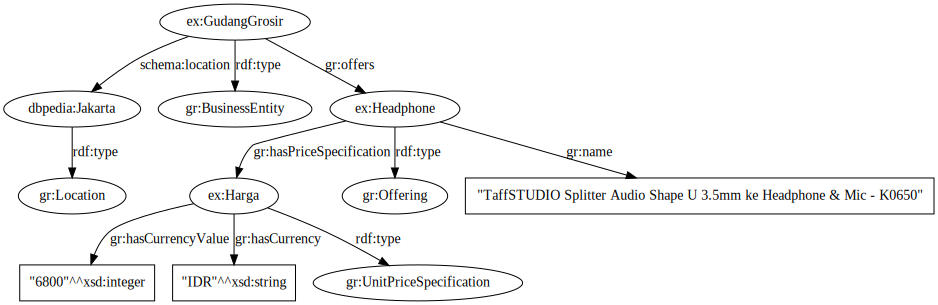

In [51]:
%%rdf turtle
# Data 1

## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

## Class

## Properties

## Data 1
ex:GudangGrosir a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:GudangGrosir schema:location dbpedia:Jakarta .

ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "IDR"^^xsd:string .
ex:Harga gr:hasCurrencyValue "6800"^^xsd:integer .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "TaffSTUDIO Splitter Audio Shape U 3.5mm ke Headphone & Mic - K0650" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:GudangGrosir gr:offers ex:Headphone .

## SHACL

sebutkan aturan pada SHACL anda
* Aturan untuk BusinessEntityShape:
  * class: BusinessEntity
  * properti: location dengan class Location dan offers
* OfferingShape:
  * class: Offering
  * properti: hasPriceSpecification dengan class gr:UnitPriceSpecification
* UnitPriceSpecificationShape:
  * class: UnitPriceSpecification
  * properti: hasCurrency dengan tipe string dan hasCurrencyValue dengan tipe integer



In [52]:
# ex:Computindo a gr:BusinessEntity .
# dbpedia:Jakarta a gr:Location .
# ex:Computindo schema:location dbpedia:Jakarta .

# ex:Harga a gr:UnitPriceSpecification .
# ex:Harga gr:hasCurrency "IDR"^^xsd:string .
# ex:Harga gr:hasCurrencyValue "459100"^^xsd:integer .

# ex:Headphone a gr:Offering .
# ex:Headphone gr:name "Zjiang Printer Resep Thermal Bluetooth - ZJ-5802DD" .
# ex:Headphone gr:hasPriceSpecification ex:Harga .

# ex:Computindo gr:offers ex:Headphone .

shapes_graph = """
@prefix sh:     <http://www.w3.org/ns/shacl#> .

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

ex:BusinessEntityShape a sh:NodeShape ;
    sh:targetClass gr:BusinessEntity ;
    sh:property [
        sh:path schema:location;
	      sh:targetClass gr:Location;
    ] ;
        sh:property [
        sh:path gr:offers;
	      sh:targetClass gr:name;
    ] .

ex:OfferingShape a sh:Nodeshape ;
    sh:targetClass gr:Offering ;
    sh:property [
      sh:path gr:hasPriceSpecification ;
      sh:targetClass gr:UnitPriceSpecification ;
  ] .

ex:UnitPriceSpecificationShape a sh:Nodeshape ;
    sh:targetClass gr:UnitPriceSpecification ;
    sh:property [
      sh:path gr:hasCurrency ;
      sh:datatype xsd:string ;
    ] ;
    sh:property [
      sh:path gr:hasCurrencyValue ;
      sh:datatype xsd:integer ;
    ] .


"""

## Data Graph



In [53]:
# dua data_graph yang seharusnya valid dan yang seharusnya tidak valid
data_graph_valid = """
# Data 1
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

ex:Computindo a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:Computindo schema:location dbpedia:Jakarta .

ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "IDR"^^xsd:string .
ex:Harga gr:hasCurrencyValue "459100"^^xsd:integer .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "Zjiang Printer Resep Thermal Bluetooth - ZJ-5802DD" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:Computindo gr:offers ex:Headphone .
"""

# dua data_graph yang seharusnya valid dan yang seharusnya tidak valid
data_graph_invalid = """
# Data 2

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

ex:SoundSquare a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:SoundSquare schema:location dbpedia:Jakarta .

# Perhatikan datatype untuk hasCurrency dan hasCurrencyValue
ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "USD"^^xsd:float .
ex:Harga gr:hasCurrencyValue "8.2"^^xsd:float .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "TaffSTUDIO Mikrofon Kondenser Studio dengan Shockproof Mount - BM-800" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:SoundSquare gr:offers ex:Headphone .
"""

# Validasi SHACL

In [54]:
!python -m pip install --no-input pyshacl --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sparqlslurper 0.4.1 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.
pyshexc 0.8.3 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.
pyshex 0.7.20 requires rdflib~=5.0, but you have rdflib 6.0.1 which is incompatible.


In [55]:
import pyshacl

results = pyshacl.validate(
    data_graph_valid,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms, report_graph, report_text = results

print("conforms untuk data 1: ", conforms)

conforms untuk data 1:  True


In [56]:
results2 = pyshacl.validate(
    data_graph_invalid,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms2, report_graph2, report_text2 = results2

print("conforms untuk data 2: ", conforms2)

Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:datatype xsd:string ; sh:path gr:hasCurrency ]
	Focus Node: ex:Harga
	Value Node: Literal("USD" = None, datatype=xsd:float)
	Result Path: gr:hasCurrency
	Message: Value is not Literal with datatype xsd:string

Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:datatype xsd:integer ; sh:path gr:hasCurrencyValue ]
	Focus Node: ex:Harga
	Value Node: Literal("8.2", datatype=xsd:float)
	Result Path: gr:hasCurrencyValue
	Message: Value is not Literal with datatype xsd:integer



conforms untuk data 2:  False


/usr/local/lib/python3.7/dist-packages/rdflib/term.py:1276: UserWarning: Serializing weird numerical rdflib.term.Literal('USD', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float'))
  return self._literal_n3(False, qname_callback)


## Daftar Pustaka:

1. Rakhmawati, N. A. (2015). Semantic Web dan Linked Data. Yogyakarta, Indonesia: SiBuku.
2. Rochim Farul Noviyan, Hasna Zakiyyah Harsari, Reyhan Venyutzky, & Nur Aini Rakhmawati. (2021). rochimfn/tekweb-tugas-pertemuan4: Release v0.1 (v0.1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.5520879
3. Noviyan, Rochim & Zakiyyah Harsari, Hasna & Venyutzky, Reyhan & Rakhmawati, Nur. (2021). Semantic Web Vocabulary Toko Online di Jakmall. 10.13140/RG.2.2.32347.28962. 
4. Holger Knublauch and Dimitris Kontokostas. Shapes constraint language (SHACL). W3C Working Draft, https://www.w3.org/TR/2017/WD-shacl-20170202
5. Rochim Farul Noviyan, Hasna Zakiyyah Harsari, Reyhan Venyutzky, & Nur Aini Rakhmawati. (2021). rochimfn/tekweb-tugas-pertemuan5: Release v0.1 (v0.1). Zenodo. https://doi.org/10.5281/zenodo.5551219






